# Check dataeng campaign

author: steeve.laquitaine@epfl.ch  
date: 14.09.2023   
status: OK  
regression: None  

summary:  
- sampling frequency: 40 KHz 

## Setup 

Create and activate `npx_10m_384ch_unit_classes`

In [1]:
import pandas as pd
import os 
from matplotlib import pyplot as plt
import bluepy as bp
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/bernstein_2023/"

os.chdir(PROJ_PATH)
from src.nodes.utils import get_config

# SET PARAMETERS
EXPERIMENT = "silico_neuropixels"
RUN = "2023_08_17"
CHANNEL = 0                         # set contact channel to plot

# SET RUN CONFIG
data_conf, param_conf = get_config(EXPERIMENT, RUN).values()

# Get paths
CAMPAIGN_PATH = data_conf["dataeng"]["campaign"]["input"]

# simulation duration in secs
SIM_DURATION = 10

# sampling frequency in timepoint per seconds
SAMPLING_FREQ = 40000

2023-09-14 17:42:35,915 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-14 17:42:36,047 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Check simulation 0 (10 secs)

- 385 contacts (last is a test contact)
- 400000 timepoints for a 10 sec simulation
- there is a large initial deflection up to 1 secs (40,000 timepoints) for each new simulation, because the circuit is getting connected (see workflow config files)

In [2]:
# read simulation
sim = bp.Simulation(CAMPAIGN_PATH + "/" + str(0) + "/BlueConfig")

# read lfp report
report = sim.report("lfp")

# get trace
sim_traces = report.get(
        t_start=report.meta["start_time"], t_end=report.meta["end_time"]
    )
print("simulated data shape", sim_traces.shape)

# unit-testing
assert SIM_DURATION * SAMPLING_FREQ==400000, "there should be 400000 timepoints"
assert sim_traces.shape[1]==385, "there should be 385 contact columns"

simulated data shape (400000, 385)


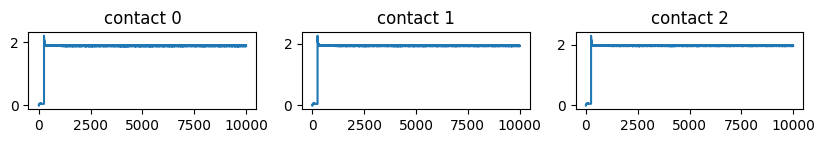

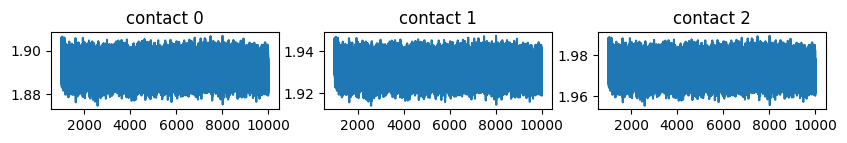

In [3]:
# plot trace from contact 0
fig, axes = plt.subplots(1,3, figsize=(10,1));

contact_id = 0
axes[0].plot(sim_traces.iloc[:,0]);
axes[0].set_title(f"contact {contact_id}");

contact_id =  1
axes[1].plot(sim_traces.iloc[:,contact_id]);
axes[1].set_title(f"contact {contact_id}");

contact_id =  2
axes[2].plot(sim_traces.iloc[:,contact_id]);
axes[2].set_title(f"contact {contact_id}");

# remove initial period of circuit setup (connection)
fig, axes = plt.subplots(1,3, figsize=(10,1));

contact_id = 0
axes[0].plot(sim_traces.iloc[40000:,0]);
axes[0].set_title(f"contact {contact_id}");

contact_id =  1
axes[1].plot(sim_traces.iloc[40000:,contact_id]);
axes[1].set_title(f"contact {contact_id}");

contact_id =  2
axes[2].plot(sim_traces.iloc[40000:,contact_id]);
axes[2].set_title(f"contact {contact_id}");

### Load a campaign stacking 4 x 10 secs simulations (experiment)

**unit-testing**:
- 18 simulations * 9,000 ms (10,000 ms - first 1,000 ms for circuit setup) = 162,000 ms

In [5]:
# load trace
campaign_trace = pd.read_pickle(data_conf["dataeng"]["campaign"]["output"]["trace_file_path"]);

# unit-test duration in ms
assert round(max(campaign_trace.index))==162000, "duration for a campaign stacking 4 simulations should be 162,000 ms"

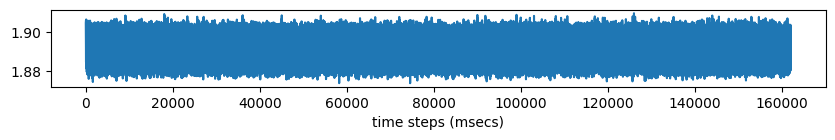

In [16]:
# plot
fig, axes = plt.subplots(1,1, figsize=(10,1))
plt.plot(campaign_trace[CHANNEL]);
plt.xlabel("voltage (mV)");
plt.xlabel("time steps (msecs)");